In [88]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

In [89]:
df = pd.read_csv('data.csv')

In [90]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [91]:
df.head(5
        )

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [92]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [93]:
X = df.drop('diagnosis', axis=1)
y= df['diagnosis'].to_frame()

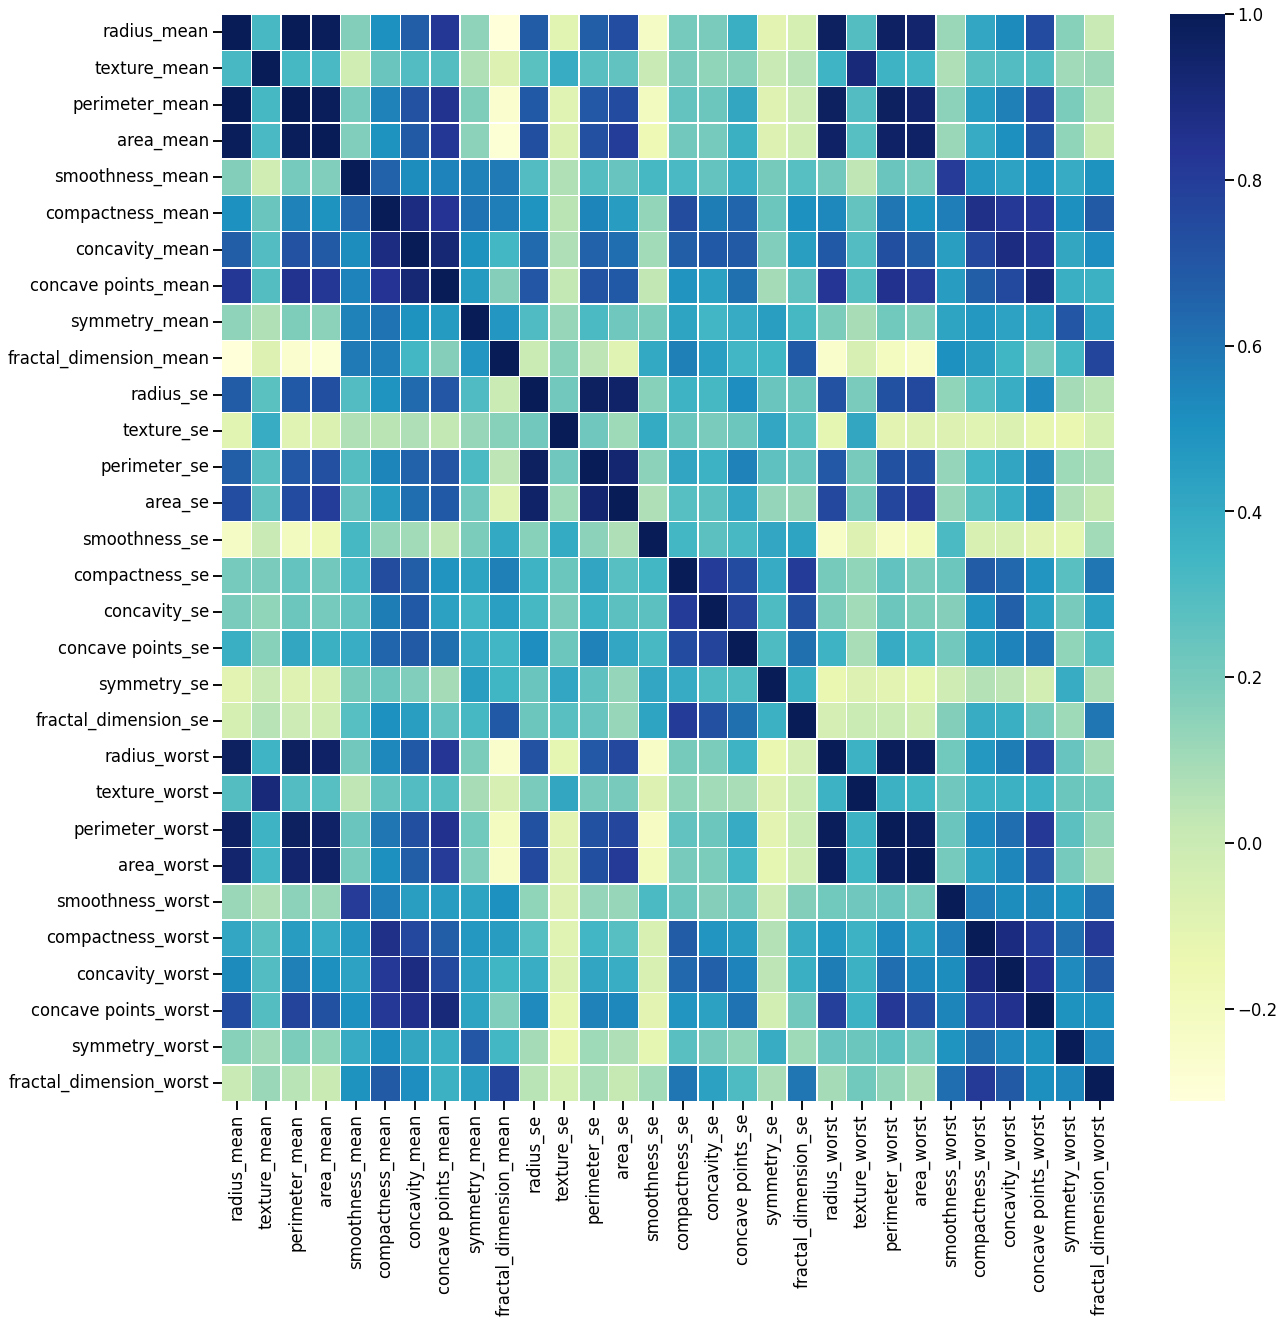

In [126]:
ax , fig = plt.subplots(figsize=(20,20))
sns.heatmap(X.corr(),linewidths=.5, cmap="YlGnBu")

In [121]:
sns.pairplot(X)

Error in callback <function flush_figures at 0x7fbf054f5170> (for post_execute):


KeyboardInterrupt: ignored

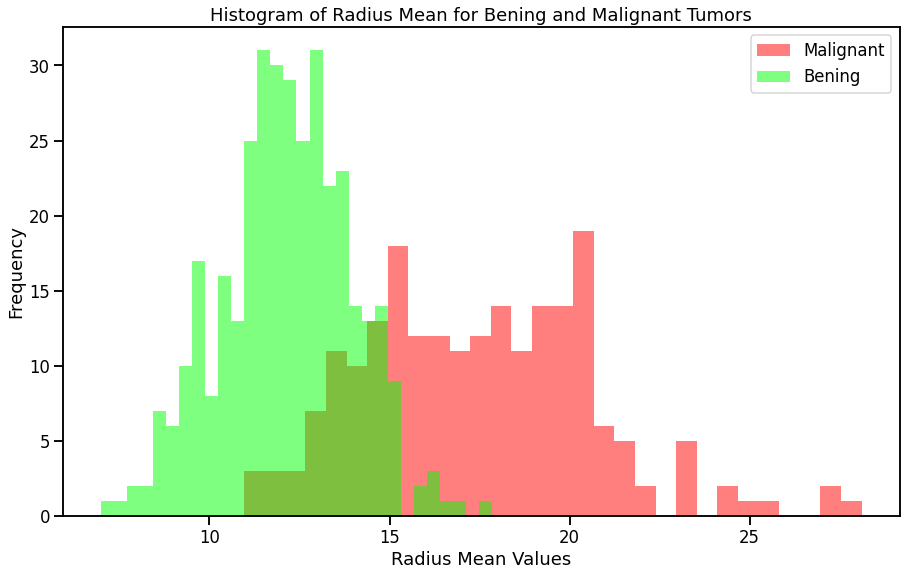

In [95]:
ax , fig = plt.subplots(figsize=(15,9))
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

-The radius mean of malignant tumors are bigger than radius mean of bening tumors mostly

-The bening distribution (green in graph) is approcimately bell-shaped that is shape of normal distribution (gaussian distribution)


In [96]:
data_bening = df[df["diagnosis"] == "B"]
data_malignant = df[df["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()

In [97]:
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
print("Outliers Values: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers Values:  [ 6.981 16.84  17.85 ]


In [98]:
melted_data = pd.melt(df,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])

[Text(0, 0.5, 'Value'), Text(0.5, 0, 'Features')]

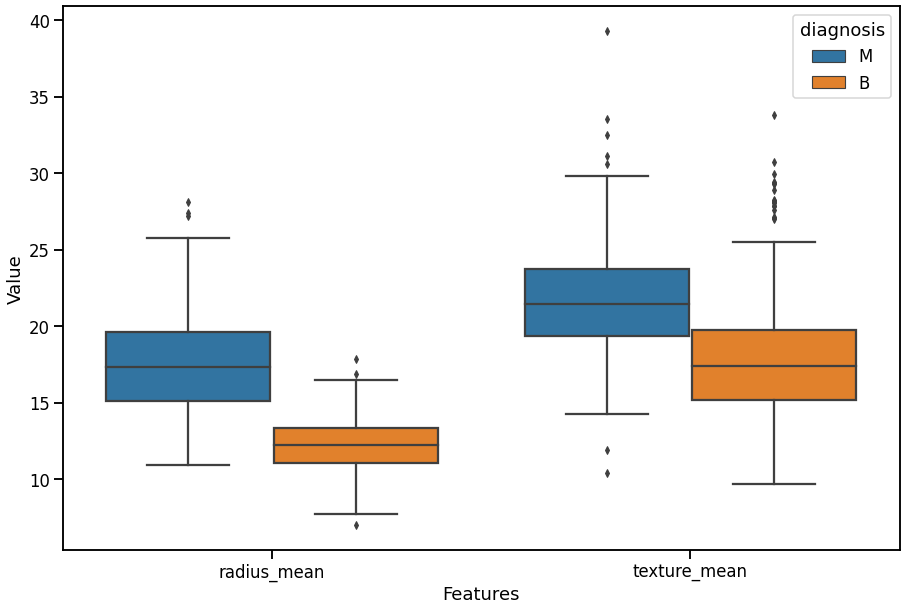

In [99]:
plt.figure(figsize = (15,10))
bx= sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
bx.set(xlabel='Features', ylabel='Value')


Summary Statistics:

-Mean

-Variance: spread of distribution

-Standart deviation square root of variance

-Lets look at summary statistics of bening tumor radiance mean

In [100]:
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.14652380952381
variance:  3.170221722043872
standart deviation (std):  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


**Effect size:**

One of the summary statistics.

It describes size of an effect. It is simple way of quantifying the difference between two groups.

Effect size is 2.2 that is too big and says that two groups are different from each other as we expect. Because our groups are bening radius mean and malignant radius mean that are different from each other

In [101]:
mean_diff = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean()
var_bening = data_bening.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.2048585165041428


In [102]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [103]:
X.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [104]:
from sklearn.preprocessing import LabelEncoder
ycols = y.columns
le = LabelEncoder()
ys= le.fit_transform(y)
ys = pd.DataFrame(ys, columns=['%s_scaled' % f for f in ycols])

In [106]:
y.value_counts()

diagnosis
B            357
M            212
dtype: int64

In [107]:
ys.value_counts()

diagnosis_scaled
0                   357
1                   212
dtype: int64

In [108]:
cols = X.columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['%s_scaled' % f for f in cols])

In [109]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean_scaled,569.0,0.338222,0.166787,0.0,0.223342,0.302381,0.416442,1.0
texture_mean_scaled,569.0,0.323965,0.145453,0.0,0.218465,0.308759,0.408860,1.0
perimeter_mean_scaled,569.0,0.332935,0.167915,0.0,0.216847,0.293345,0.416765,1.0
area_mean_scaled,569.0,0.216920,0.149274,0.0,0.117413,0.172895,0.271135,1.0
smoothness_mean_scaled,569.0,0.394785,0.126967,0.0,0.304595,0.390358,0.475490,1.0
compactness_mean_scaled,569.0,0.260601,0.161992,0.0,0.139685,0.224679,0.340531,1.0
concavity_mean_scaled,569.0,0.208058,0.186785,0.0,0.069260,0.144189,0.306232,1.0
concave points_mean_scaled,569.0,0.243137,0.192857,0.0,0.100944,0.166501,0.367793,1.0
symmetry_mean_scaled,569.0,0.379605,0.138456,0.0,0.282323,0.369697,0.453030,1.0
fractal_dimension_mean_scaled,569.0,0.270379,0.148702,0.0,0.163016,0.243892,0.340354,1.0


In [115]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test= train_test_split(X_scaled,ys, test_size= 0.3, stratify=y)

In [128]:
# Import TPOTClassifier and roc_auc_score
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=10,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9981241379310344

Generation 2 - Current best internal CV score: 0.9981241379310344

Generation 3 - Current best internal CV score: 0.9982574712643679

Generation 4 - Current best internal CV score: 0.9982574712643679

Generation 5 - Current best internal CV score: 0.9982574712643679

Generation 6 - Current best internal CV score: 0.998390804597701

Generation 7 - Current best internal CV score: 0.998390804597701

Generation 8 - Current best internal CV score: 0.998390804597701

Generation 9 - Current best internal CV score: 0.9983954022988506

Generation 10 - Current best internal CV score: 0.9983954022988506

Best pipeline: LogisticRegression(BernoulliNB(SelectFwe(input_matrix, alpha=0.003), alpha=10.0, fit_prior=False), C=15.0, dual=False, penalty=l2)

AUC score: 0.9869

Best pipeline steps:
1. SelectFwe(alpha=0.003)
2. StackingEstimator(estimator=BernoulliNB(alpha=10.0, fit_prior=False))
3. LogisticRegression(C=15.0, random_state=42

In [139]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=15.0, dual=False,penalty='l2')
lr.fit(X_train, y_train)
roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

0.9862733644859812

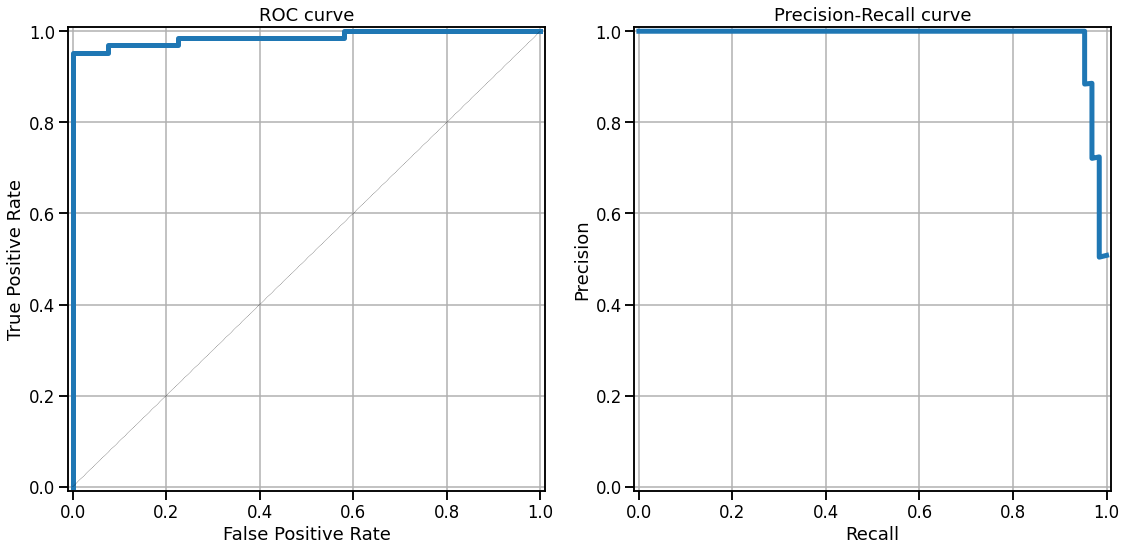

In [140]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = lr.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision,  linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

Text(0.5, 73.5, 'Ground Truth')

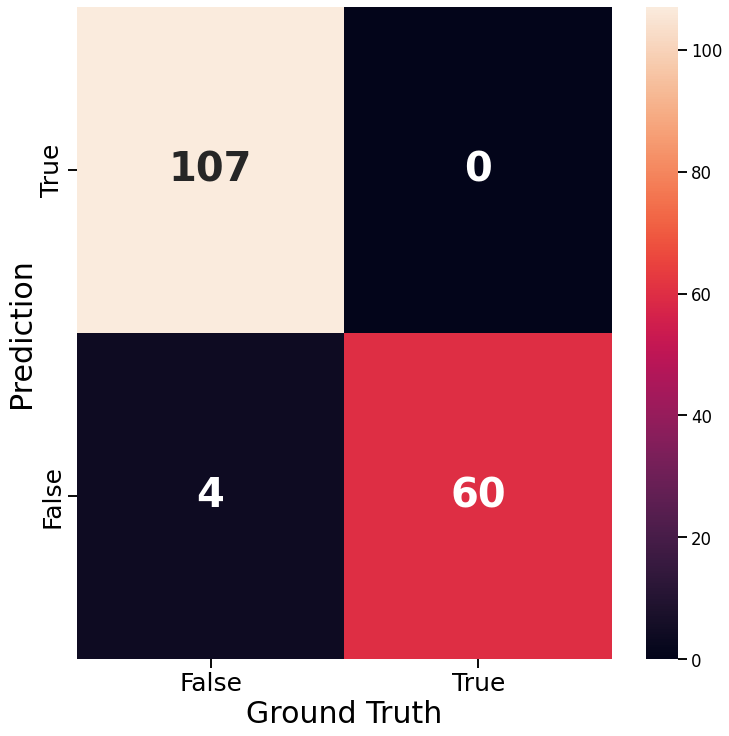

In [141]:
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [119]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
# Instantiate an AdaBoost classifier 'adab_clf'adb_
clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
dt.fit(X_train, y_train)
print('For decision tree:',roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))
clf.fit(X_train, y_train)
print('For Adaboost:',roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

For decision tree: 0.911945093457944
For Adaboost: 0.978679906542056


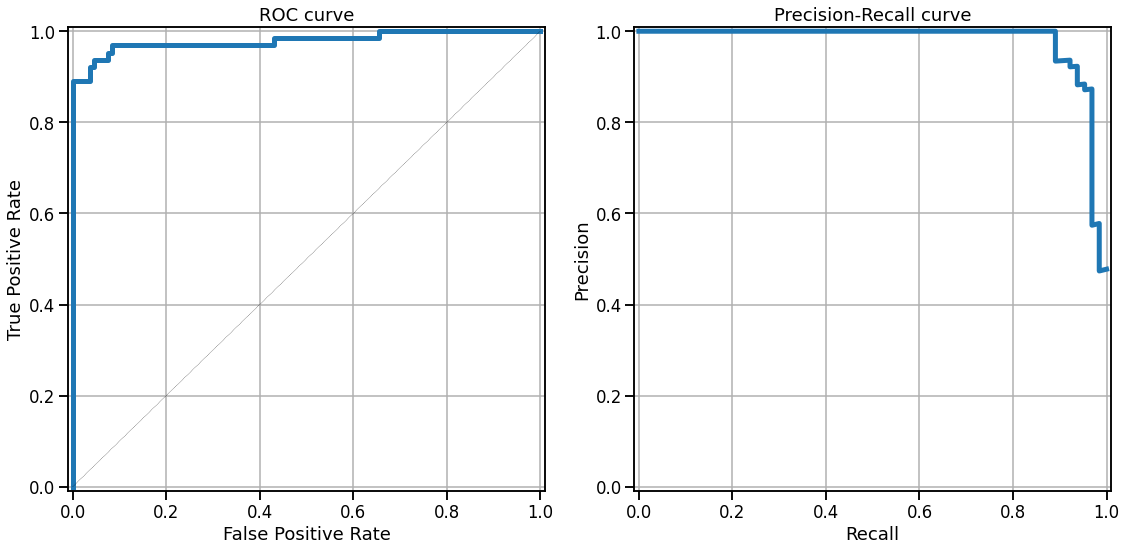

In [127]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = clf.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision,  linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

Text(0.5, 73.5, 'Ground Truth')

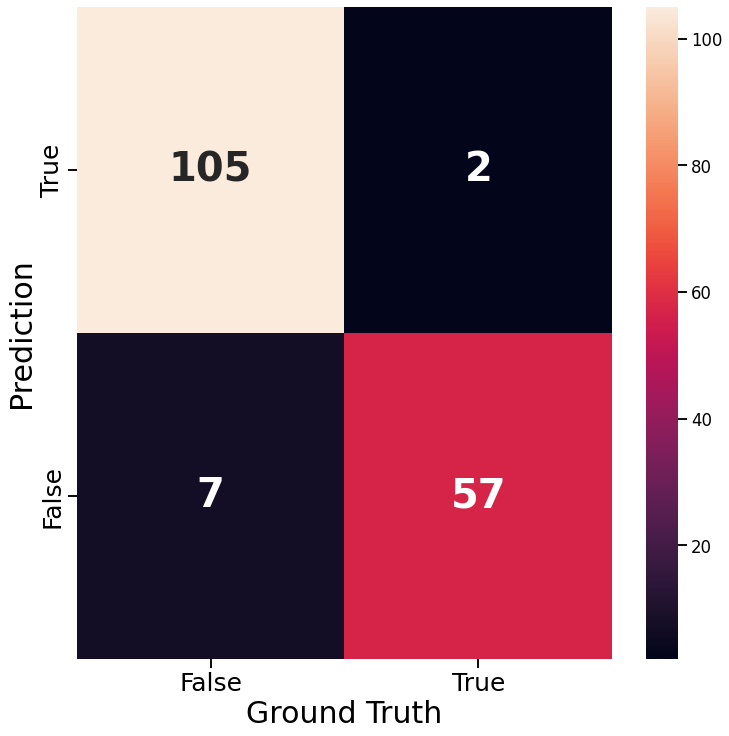

In [131]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

0.9726927570093458

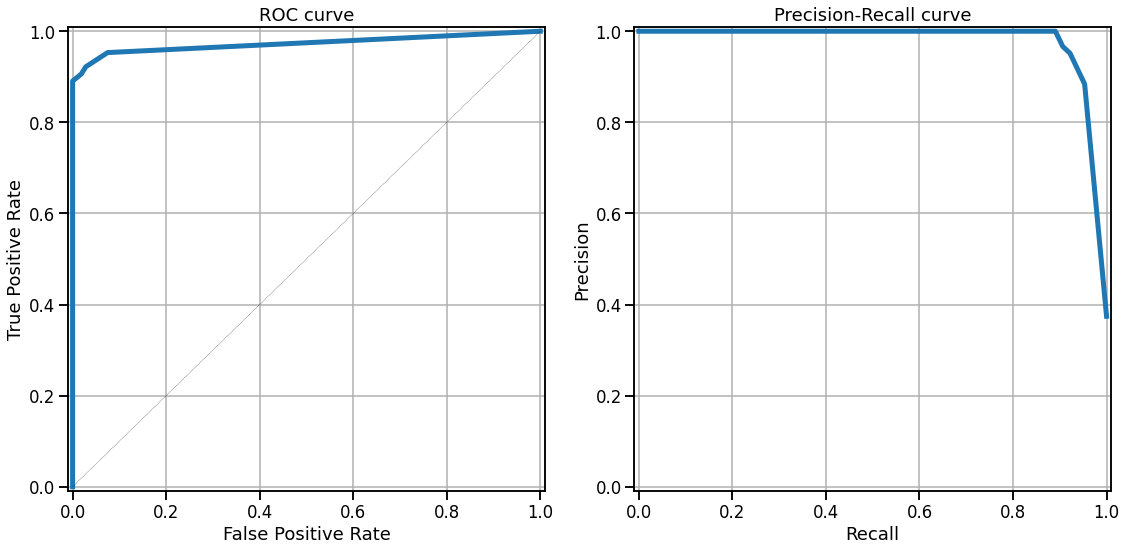

In [132]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = knn.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision,  linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

Text(0.5, 73.5, 'Ground Truth')

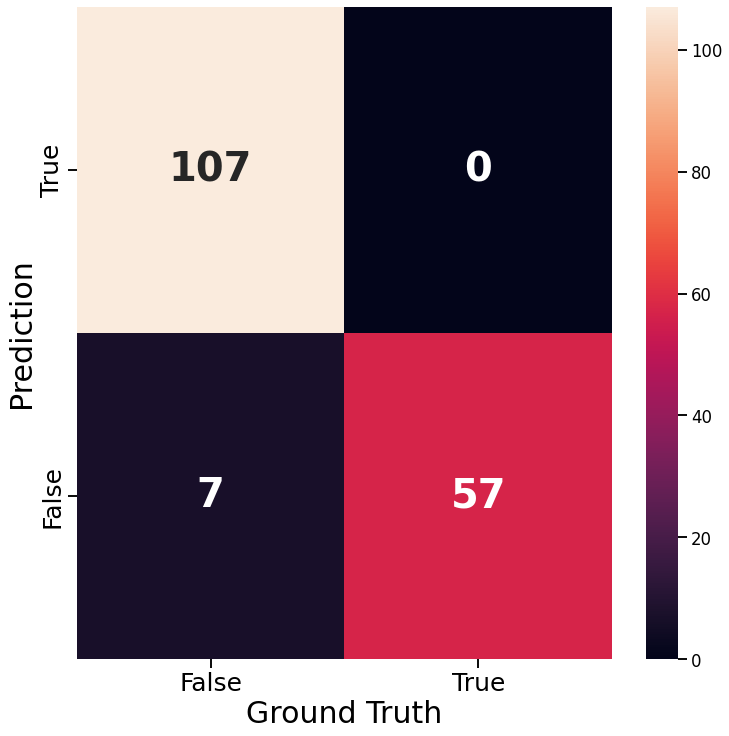

In [133]:
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

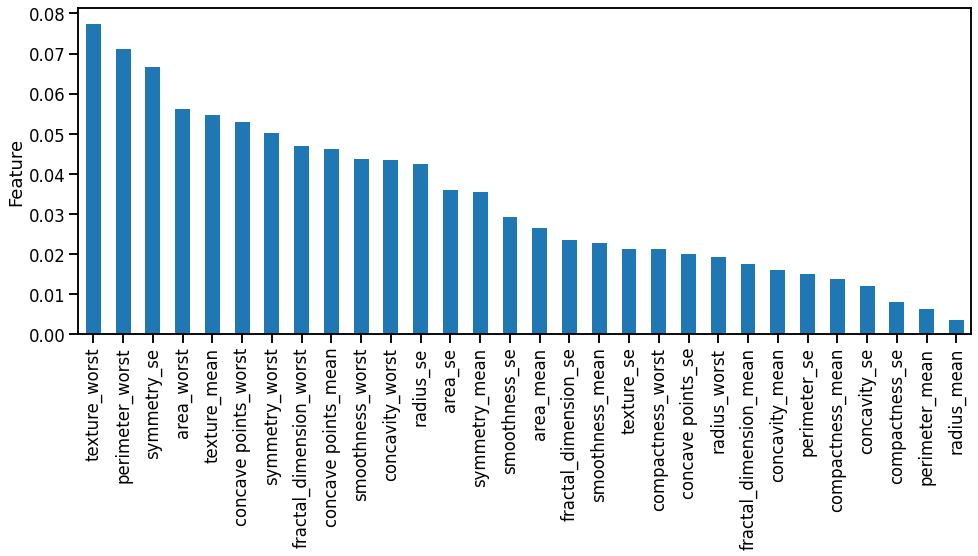

In [136]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');
